In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [2]:
import os
import pandas as pd
from termcolor import colored
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt
from natsort import natsorted
import sys
import pickle
import seaborn as sns

# Display pandas df without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%.3g" % x))



In [3]:
fieldsPerKilobot = 5 #id, x, y, ori, state
num_robot = 20
experiment_time = 900

In [4]:
bin_edges = np.linspace(0, 20, 21)
bin_edges

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [20]:
results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/CRE/results_cre/different_resources_number/different_resources_2021-05-26_900seconds/'
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/CRE/results_cre/equal_resources_number/equal_resources_2021-05-27_seconds#900/'
fileName = "seed#1_areaLOG_client.tsv"

In [21]:
if not os.path.isdir(results_folder):
    print(colored("Error, " + results_folder + " does not exist", 'red'))
else:
    print(colored("OK, " + results_folder + " exists", 'green'))

OK, /home/luigi/Documents/ARGoS/argos_results_scripts/CRE/results_cre/different_resources_number/different_resources_2021-05-26_900seconds/ exists


In [22]:
kilo_state_label = []
for i in range(num_robot):
    kilo_state_label += ["state"+str(i)]
# area_pos_label

print(kilo_state_label)

['state0', 'state1', 'state2', 'state3', 'state4', 'state5', 'state6', 'state7', 'state8', 'state9', 'state10', 'state11', 'state12', 'state13', 'state14', 'state15', 'state16', 'state17', 'state18', 'state19']


In [23]:
committed_south_count = np.zeros((experiment_time+1, num_robot+1))

print(colored("Main folder:", 'blue'),results_folder)
for filename in natsorted(os.listdir(results_folder)):
#     print('\t filename: ', filename)
    seed = filename.split("_")[0]
#     if seed == 'seed#2':
#         print(seed.split("#")[-1])
#         break

    if filename.endswith("kiloLOG_server.tsv"):
        if not os.path.getsize(os.path.join(results_folder, filename)) > 0:
            print(colored("\tWARNING, empty file at:" + filename, 'red'))
            continue
        print('\tfilename: ', filename)
        df_kilo_server = pd.read_csv(os.path.join(results_folder, filename), sep="\t",
                                     header=None)
        
        if len(df_kilo_server.columns)==102:
            print("\tCutting null elements in client kilo df")
            df_kilo_server.drop(df_kilo_server.columns[len(df_kilo_server.columns) - 1], axis=1, inplace=True)

        col_kilo_labels = ['time']
        for i in range(0, len(df_kilo_server.columns) - 1, fieldsPerKilobot):
            col_kilo_labels += ['id' + str(i // fieldsPerKilobot), 'posx' + str(i // fieldsPerKilobot), 'posy' + str(i // fieldsPerKilobot), 'ori' + str(i // fieldsPerKilobot), 'state' + str(i // fieldsPerKilobot)]

        df_kilo_server.columns = col_kilo_labels

        for row_idx,row_val in enumerate(df_kilo_server[kilo_state_label].values):
    #         print(row_idx, row_val)
            committed_south_count[row_idx, np.count_nonzero(row_val == 2)] += 1

Main folder: /home/luigi/Documents/ARGoS/argos_results_scripts/CRE/results_cre/different_resources_number/different_resources_2021-05-26_900seconds/
	filename:  seed#1_kiloLOG_server.tsv
	Cutting null elements in client kilo df
	filename:  seed#2_kiloLOG_server.tsv
	Cutting null elements in client kilo df
	filename:  seed#3_kiloLOG_server.tsv
	Cutting null elements in client kilo df
	filename:  seed#4_kiloLOG_server.tsv
	Cutting null elements in client kilo df
	filename:  seed#5_kiloLOG_server.tsv
	Cutting null elements in client kilo df
	filename:  seed#6_kiloLOG_server.tsv
	Cutting null elements in client kilo df
	filename:  seed#7_kiloLOG_server.tsv
	Cutting null elements in client kilo df
	filename:  seed#8_kiloLOG_server.tsv
	Cutting null elements in client kilo df
	filename:  seed#9_kiloLOG_server.tsv
	Cutting null elements in client kilo df
	filename:  seed#10_kiloLOG_server.tsv
	Cutting null elements in client kilo df
	filename:  seed#11_kiloLOG_server.tsv
	Cutting null element

In [24]:
# committed_south_count

([<matplotlib.axis.XTick at 0x7f2baba802e8>,
 <a list of 46 Text major ticklabel objects>)

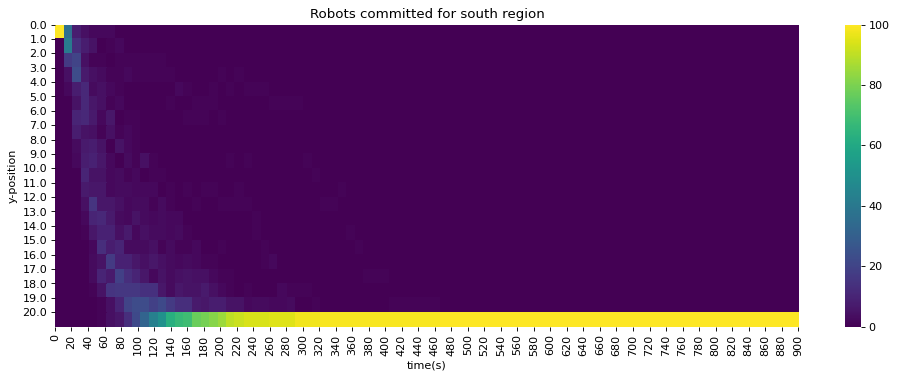

In [25]:
hist_val = np.array([])
# for x in committed_south_count:
# #     print(x.size)
#     hist,_= np.histogram(x,bin_edges)
#     hist_val = np.vstack([hist_val, hist]) if hist_val.size else hist


values = committed_south_count.T
y_edges = bin_edges.round(decimals=2)

fig = plt.figure(figsize=(15, 5), dpi=80)
# plt.xlabel('time(s)')
yticks = y_edges



# print("\t v_max:", v_max)
ax = sns.heatmap(values, yticklabels=yticks, xticklabels=np.arange(values.shape[1], step=20), cmap="viridis", vmin=0)
ax.set_title("Robots committed for south region")
ax.set_xlabel('time(s)')
plt.ylabel('y-position')
plt.yticks(np.arange(yticks.size), yticks)
plt.xticks(np.arange(values.shape[1], step=20))
# plt.savefig("commit_south_count_different_resource_numbers.png")
# plt.savefig("commit_south_count_equal_resource_numbers.png")
# plt.show()